In [18]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

In [19]:
def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [20]:
def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

In [42]:
original_image = load_image("Original Images/one_piece.jpg")
style_image = load_image("Style Images/the_wave.jpg")

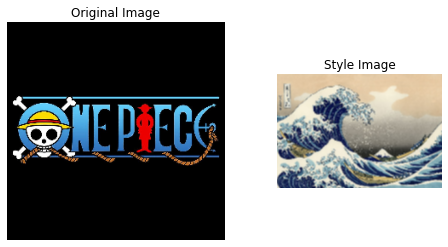

In [43]:
style_image = tf.nn.avg_pool(style_image,ksize=[3,3],strides=[1,1], padding='VALID')
visualize([original_image,style_image],["Original Image","Style Image"])

In [44]:
stylize_model = tf_hub.load('tf_model')

results = stylize_model(tf.constant(original_image),tf.constant(style_image))
tf.constant(style_image)

stylized_photo = results[0]

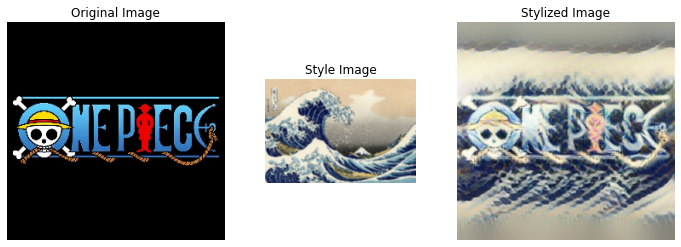

In [45]:
visualize([original_image,style_image,stylized_photo],titles=['Original Image','Style Image','Stylized Image'])